In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#cons_price_idx : 가정이 소비하기 위해 구입하는 재화와 용역의 평균 가격을 측정한 지수
#cons_conf_idx : 전체 경제상황과 개인적 재무 상황에 대해 소비자가 낙관적으로 느끼는 정도를 측정

In [5]:
bank = pd.read_csv('/content/drive/MyDrive/솔트룩스 2조/bank.csv')
bank.head()

,age,job,married,edu,default,home_loan,personal_loan,contact,month,day,duration,campaign_count,pdays,pcampaign_count,pcampaign_result,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   job               41188 non-null  object 
 2   married           41188 non-null  object 
 3   edu               41188 non-null  object 
 4   default           41188 non-null  object 
 5   home_loan         41188 non-null  object 
 6   personal_loan     41188 non-null  object 
 7   contact           41188 non-null  object 
 8   month             41188 non-null  object 
 9   day               41188 non-null  object 
 10  duration          41188 non-null  int64  
 11  campaign_count    41188 non-null  int64  
 12  pdays             41188 non-null  int64  
 13  pcampaign_count   41188 non-null  int64  
 14  pcampaign_result  41188 non-null  object 
 15  emp_var_rate      41188 non-null  float64
 16  cons_price_idx    41188 non-null  float6

In [3]:
y = bank.iloc[:, -1]
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [6]:
bank_int = bank.loc[:, ['age', 'duration', 'campaign_count', 'pdays', 'pcampaign_count']]
bank_object = bank.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result', 'y']]
bank_float = bank.loc[:, ['emp_var_rate', 'cons_price_idx', 'euribor_3m', 'nr_employed']]

In [54]:
bank.describe(include='all')

,age,job,married,edu,default,home_loan,personal_loan,contact,month,day,duration,campaign_count,pdays,pcampaign_count,pcampaign_result,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
count,41188.00000,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,11,3,7,2,2,2,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [10]:
bank.corr()

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign_count,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
pcampaign_count,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor_3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [ ]:
for i in range(len(bank.columns)):
    print(bank[bank.columns[i]].value_counts())

In [ ]:
bank['age'].hist() #중장년층이 가장 많음

In [ ]:
bank['duration'].hist() #통화시간이 거의 짧음

In [ ]:
bank['campaign_count'].hist() #컨택한 횟수가 대부분 10 미만

In [ ]:
bank['pdays'].hist() #999값이 많음

In [ ]:
bank['pcampaign_count'].hist() #이전 컨택 횟수가 대부분 0

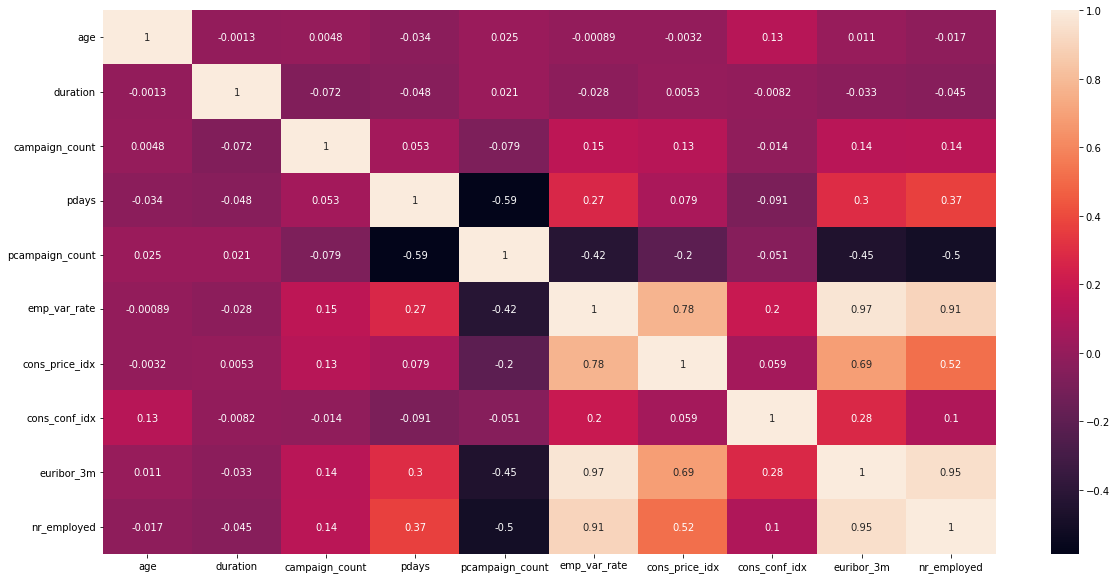

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(bank.corr(), annot=True)
plt.show()

In [ ]:
plt.scatter(bank['nr_employed'], bank['euribor_3m']) #상관계수가 높아도 서로 인과관계는 없어보임
plt.show()

In [ ]:
plt.scatter(bank['emp_var_rate'], bank['cons_price_idx'])
plt.show()

In [ ]:
plt.scatter(bank['nr_employed'], bank['emp_var_rate'])
plt.show()

##차트 그리는 함수

In [14]:
#int형 countplot
def countplot_int(data):
    plt.figure(figsize=(20, 10))

    plt.subplot(2, 3, 1)
    sns.countplot(x = data['age']//10, data=data)

    plt.subplot(2, 3, 2)
    sns.countplot(x = data['duration']//60, data=data)

    plt.subplot(2, 3, 3)
    sns.countplot(x = data['campaign_count'], data=data)

    plt.subplot(2, 3, 4)
    sns.countplot(x = data['pdays'], data=data)

    plt.subplot(2, 3, 5)
    sns.countplot(x = data['pcampaign_count'], data=data)

    plt.tight_layout()

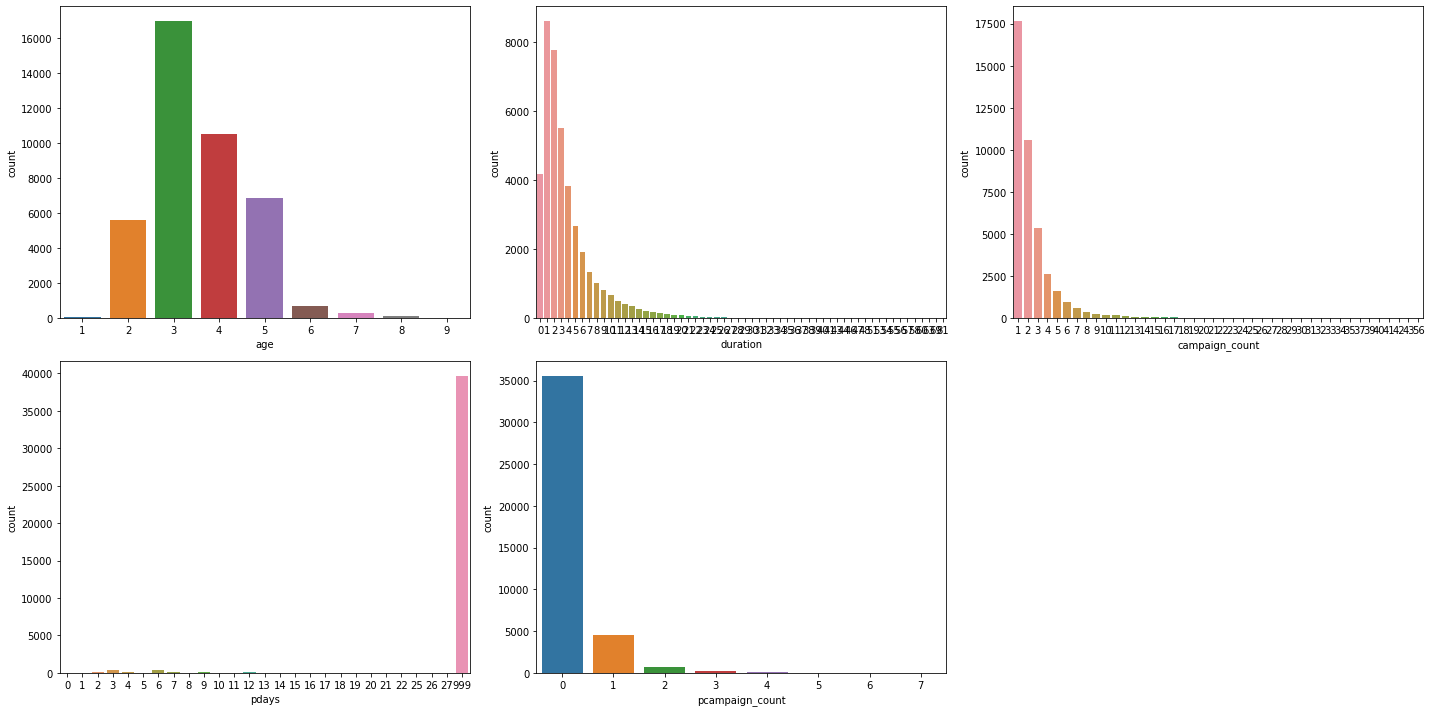

In [15]:
countplot_int(bank_int)

Job


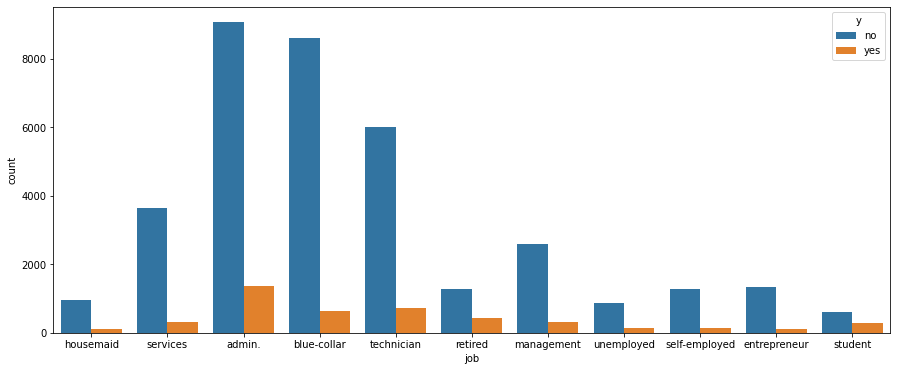

Married


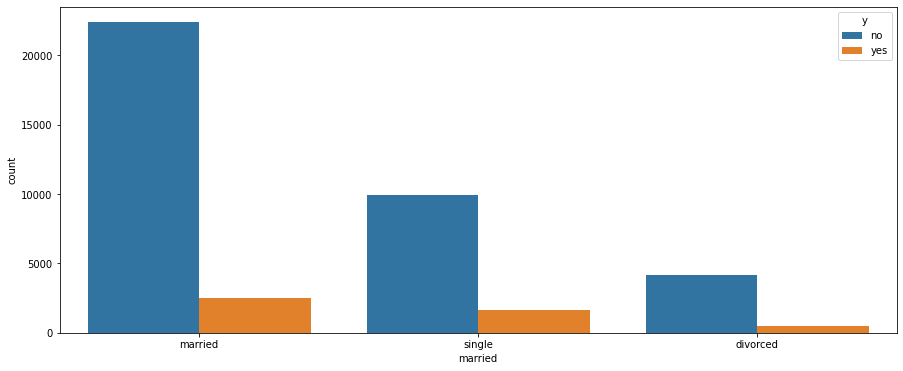

Edu


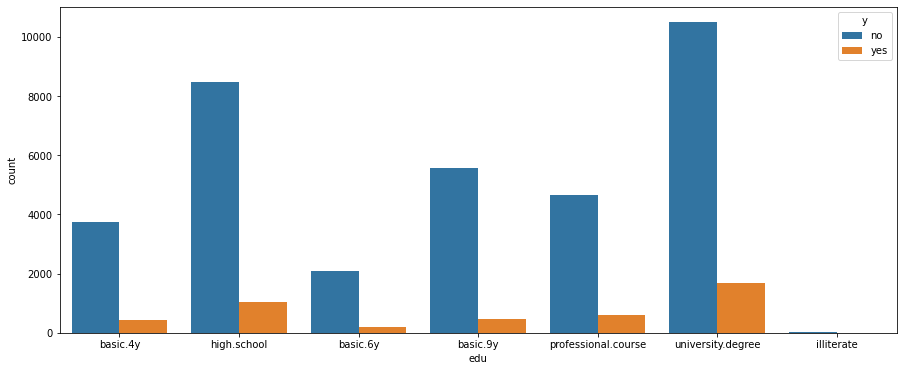

Default


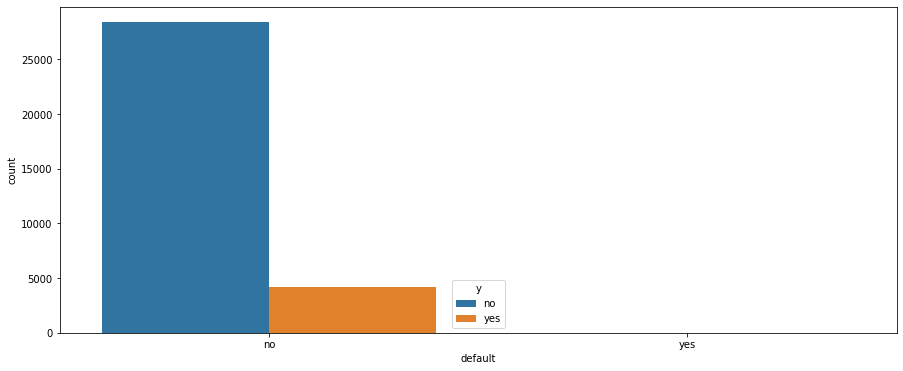

Home_Loan


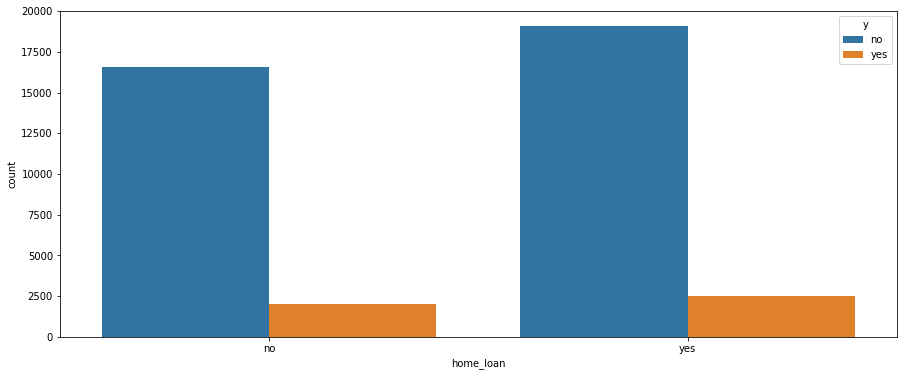

Personal_Loan


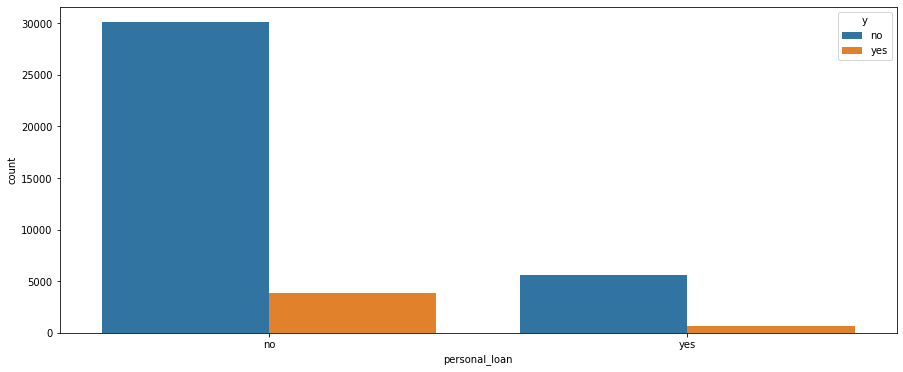

Contact


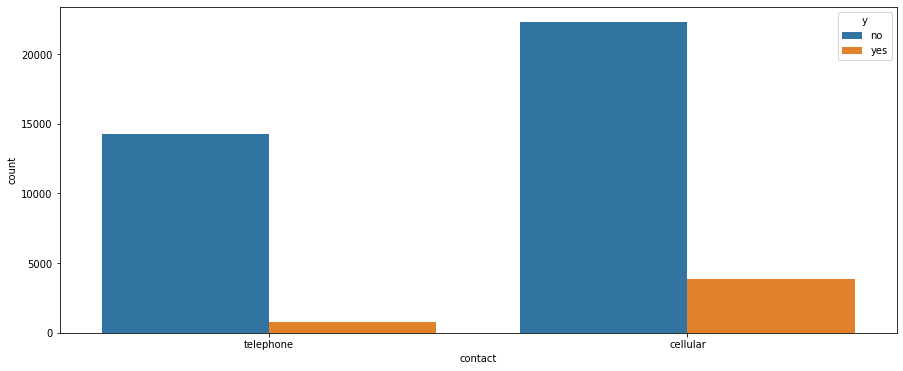

Month


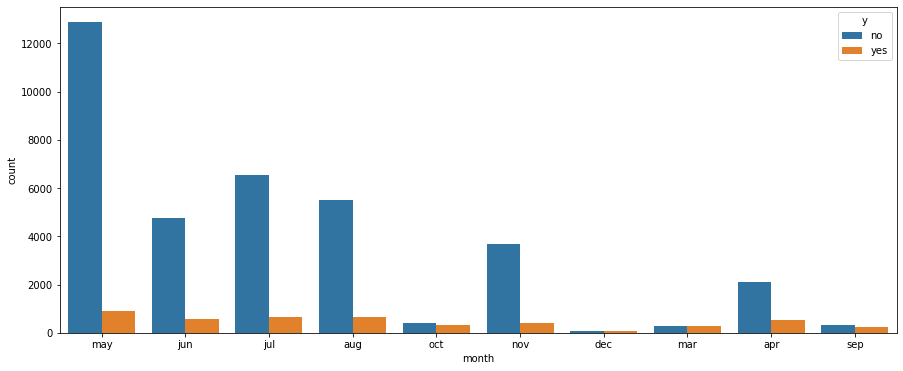

Day


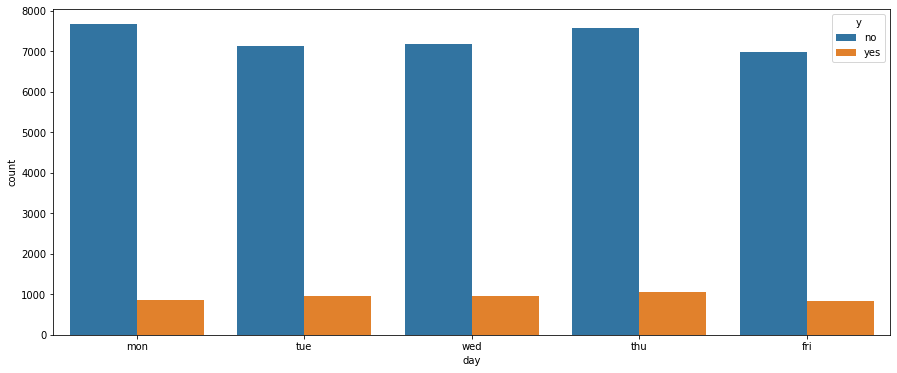

Pcampaign_Result


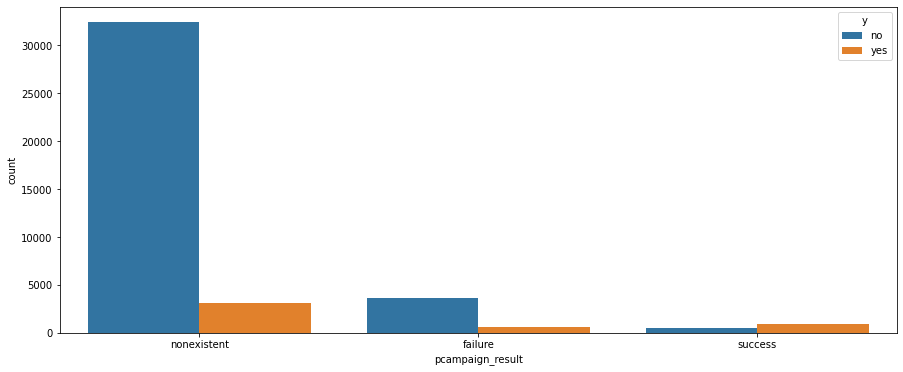

Y


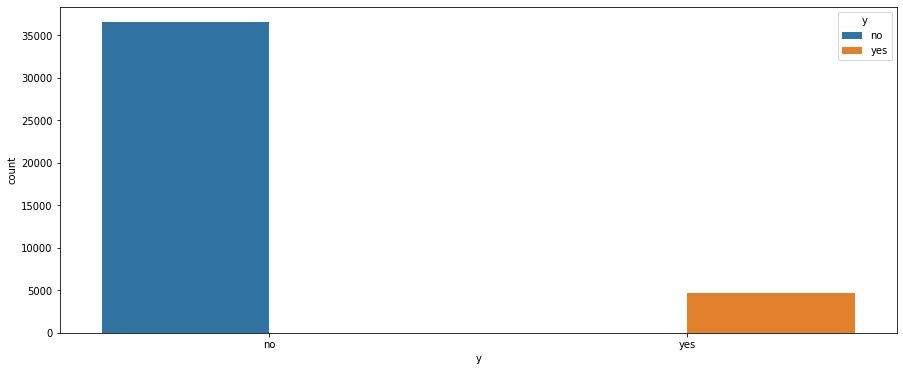

In [53]:
for column in bank_object:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x=bank[column], hue=bank["y"])
    plt.show()

In [49]:
#범주형 pieplot
def pie(data):
    count=0
    for i in data:
        fig = plt.figure(figsize=(13, 13))
        ax = fig.add_subplot()
        pie = ax.pie(x = data[i].value_counts(), autopct='%.1f%%')
        plt.title(data.columns[count],fontsize=30)
        plt.legend(pie[0],labels = data[i].unique(), loc='upper left')
        plt.show()
        count+=1
        print('\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


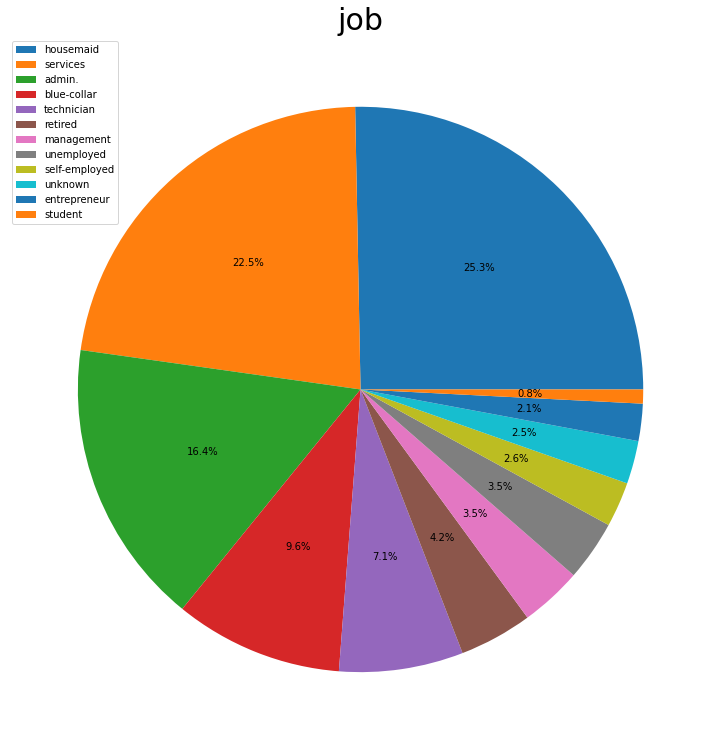

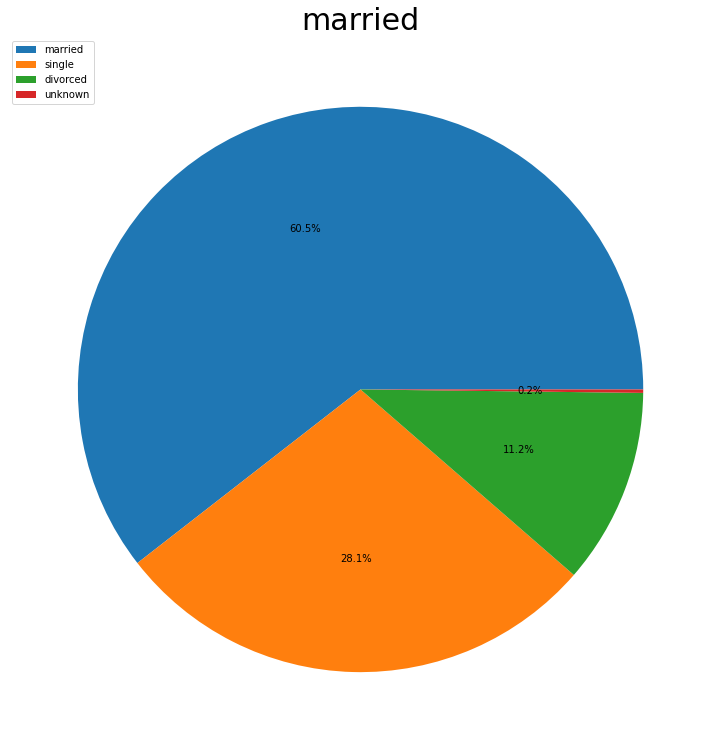

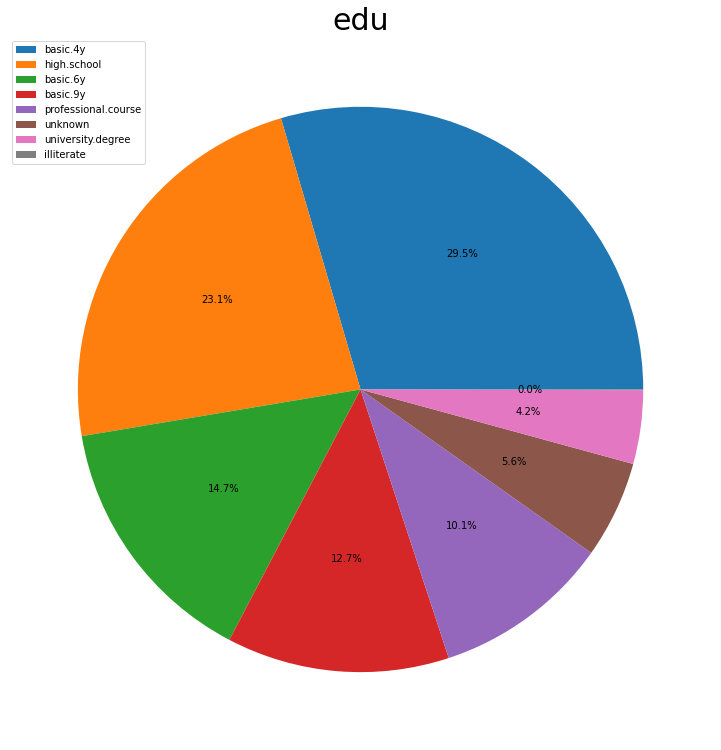

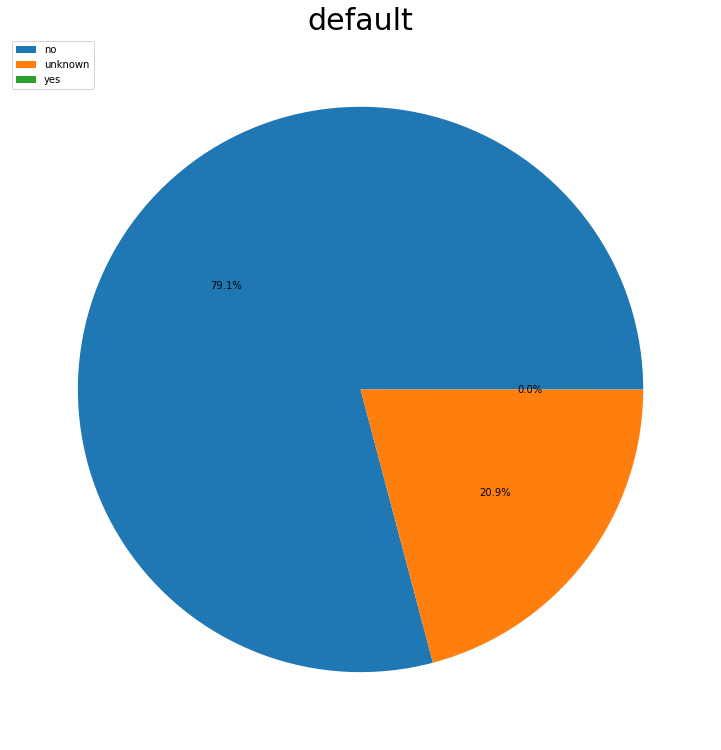

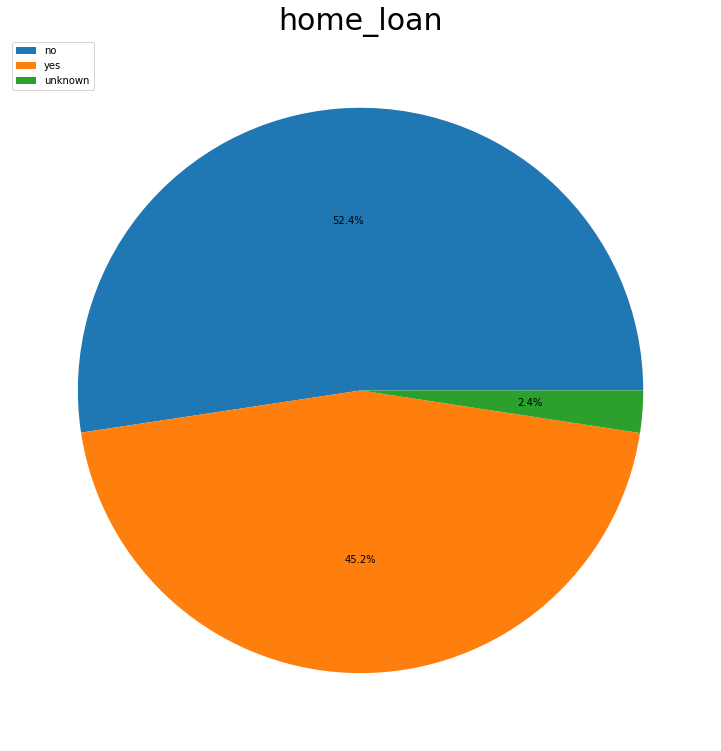

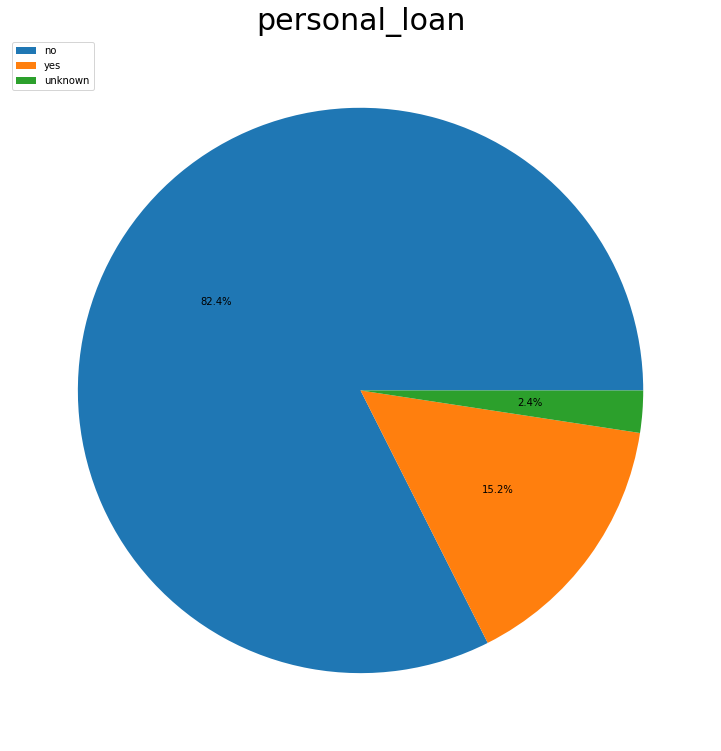

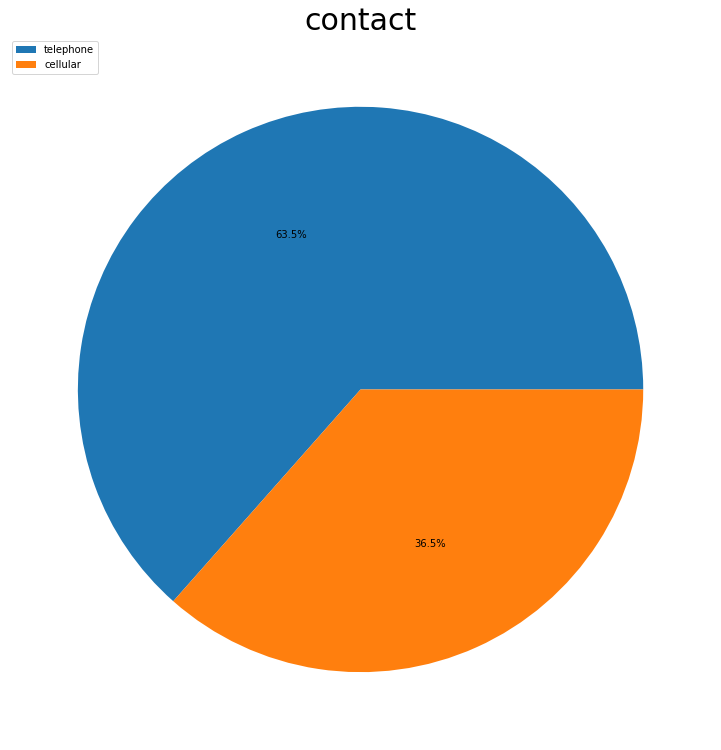

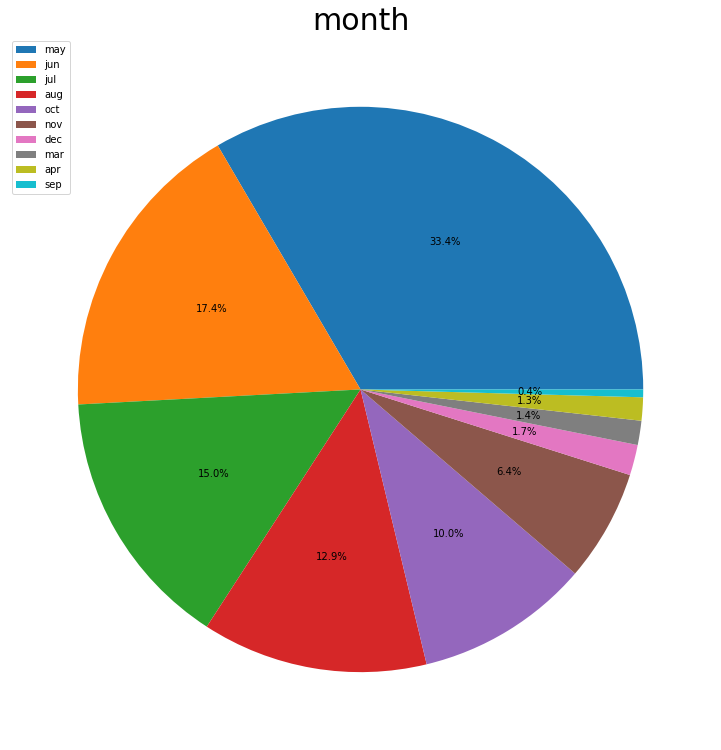

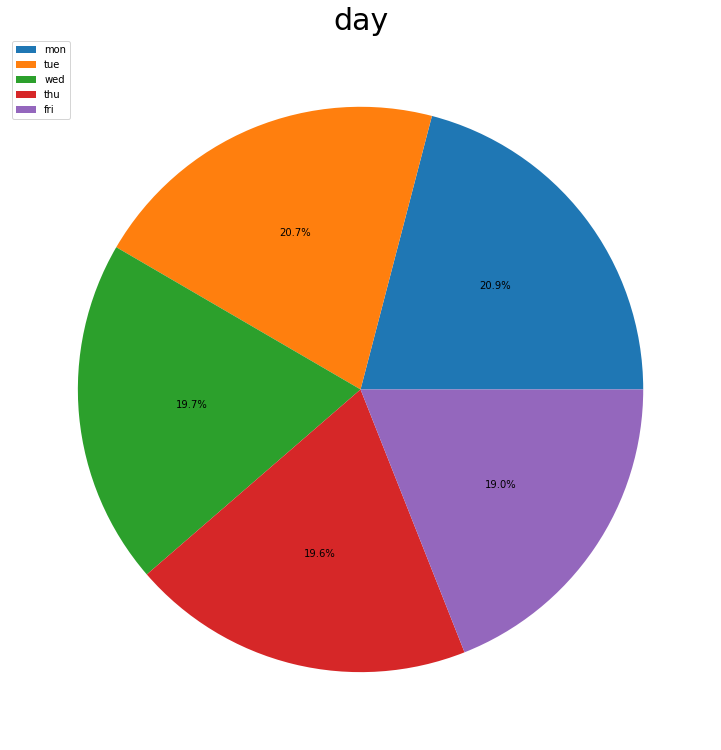

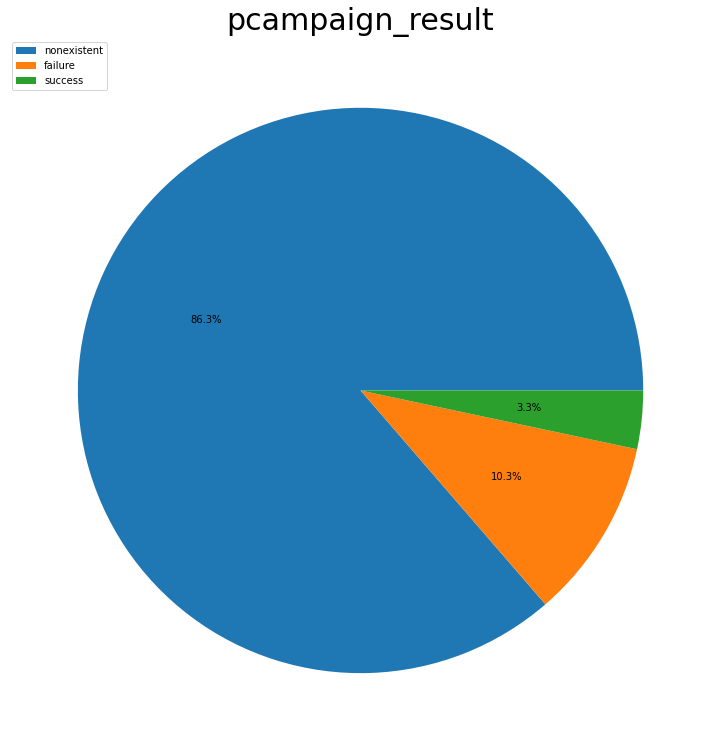

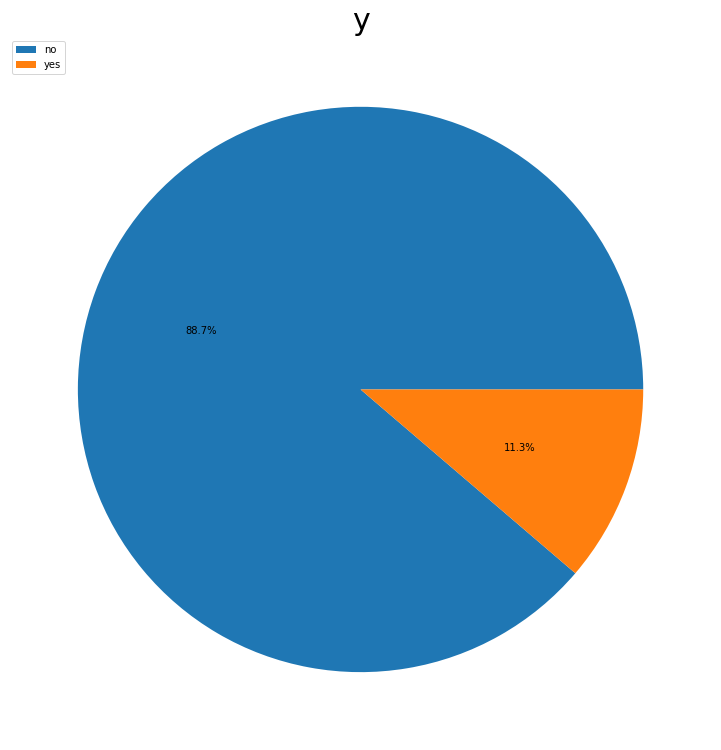

In [50]:
pie(bank_object)

In [44]:
#int형 boxplot
def boxplot_int(data):
    cnt=0
    for i in data:
        sns.boxplot(y = data[i].unique(), data = data)
        plt.title(data.columns[cnt])
        cnt+=1
        plt.show()
        print('\n')

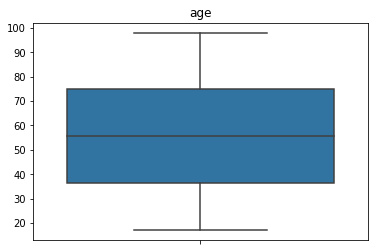

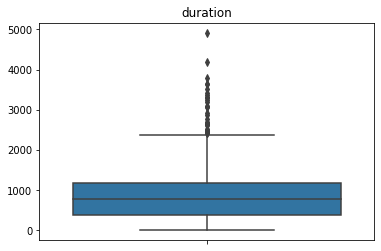

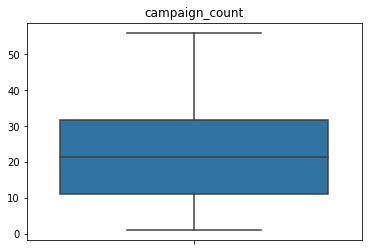

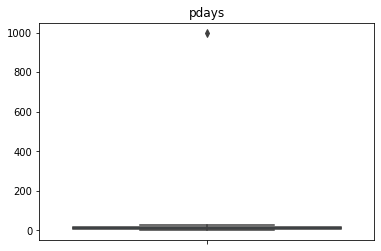

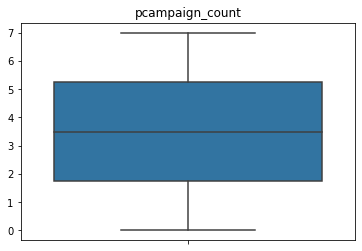

In [45]:
boxplot_int(bank_int)

In [47]:
#float형 boxplot
def boxplot_float(data):
    cnt=0
    for i in data:
        sns.boxplot(y = data[i].unique(), data = data)
        plt.title(data.columns[cnt])
        cnt+=1
        plt.show()
        print('\n')

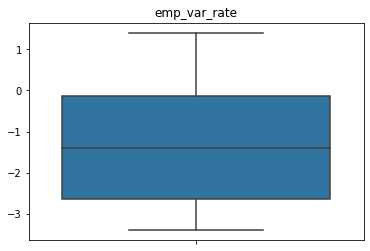

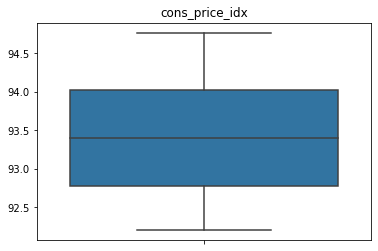

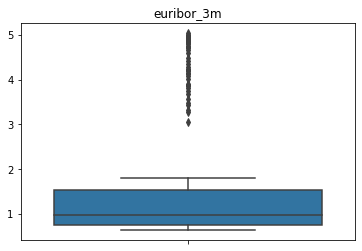

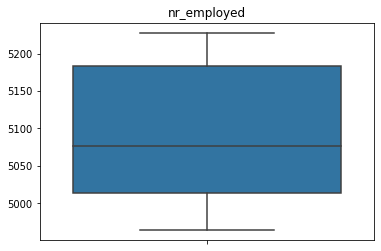

In [48]:
boxplot_float(bank_float)

##결측치 분포 확인 그래프 그리는 함수

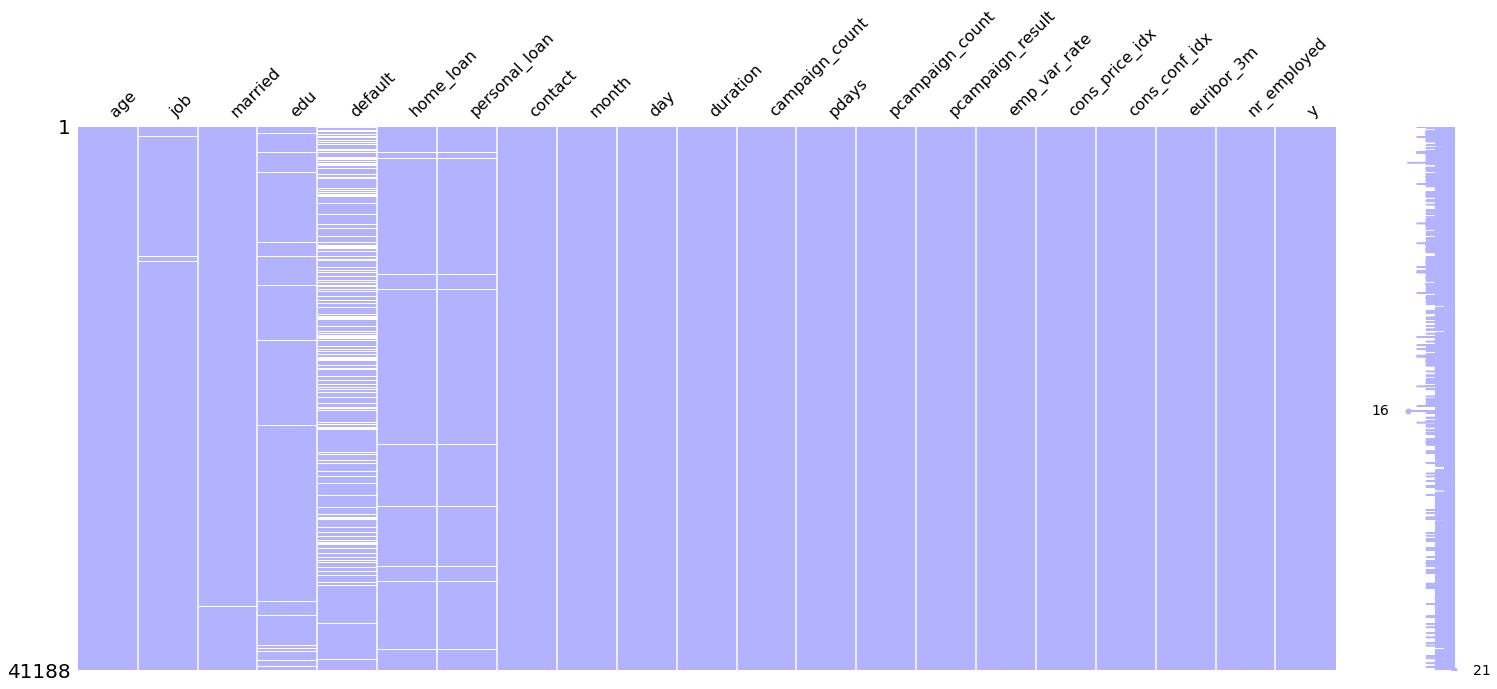

In [51]:
# unknown -> null값 변경하기
bank.replace('unknown', np.NaN, inplace=True)
bank.replace('999', np.NaN, inplace=True)


# 결측치 분포 확인하기
import missingno
missingno.matrix(bank, color=(0.7, 0.7, 1.0))
plt.show()

## 상관관계/히트맵 그래프

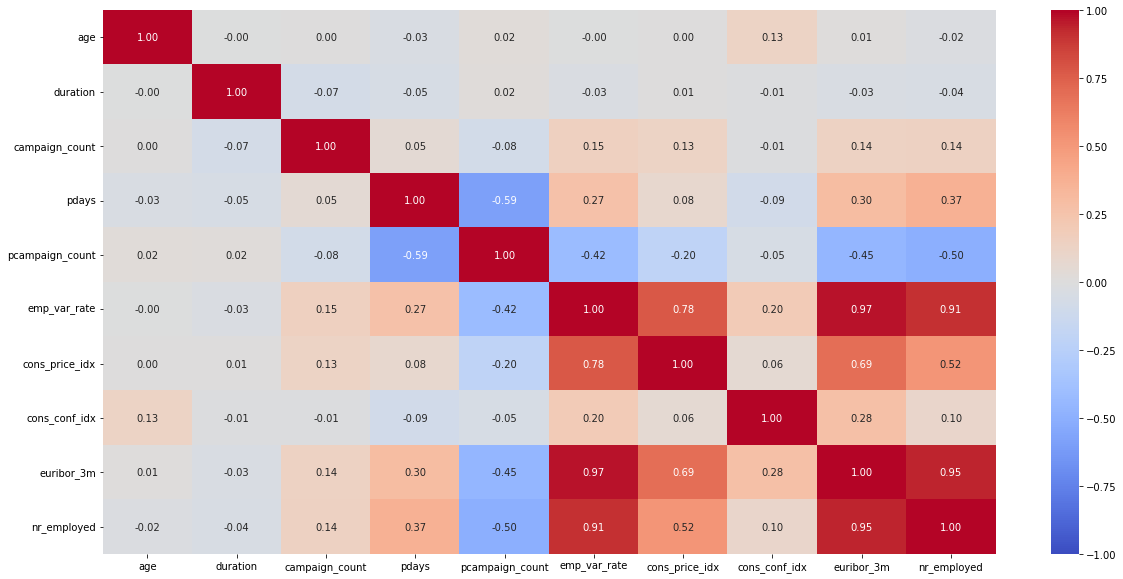

In [52]:
# 상관관계/히트맵 그래프
bank.corr()

fig, ax = plt.subplots(figsize = (20, 10))
matrix = np.triu(bank.corr())
sns.heatmap(bank.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, center= 0, cmap='coolwarm')